<a href="https://colab.research.google.com/github/Jdean4747/Data5600HW/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [8]:
X = df.drop(columns=['CustomerID'])

In [10]:
pca = PCA(n_components=3,random_state=1000)
pca_data = pca.fit_transform(X)

In [23]:
pca_scores = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3'])
loadings = pd.DataFrame(pca.components_,columns=X.columns,index=['PC1','PC2','PC3'])

In [24]:
loadings

,Gender,Age,Annual Income (k$),Spending Score (1-100)
PC1,-0.000333,-0.188977,0.588623,0.786009
PC2,0.001579,0.130961,0.808388,-0.573895
PC3,0.001462,0.973208,0.005515,0.229856


In [16]:
pca_scores.head()

,PC1,PC2,PC3
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069


In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.45118077, 0.44091539, 0.10774566])

In [19]:
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.45118077, 0.89209616, 0.99984183])

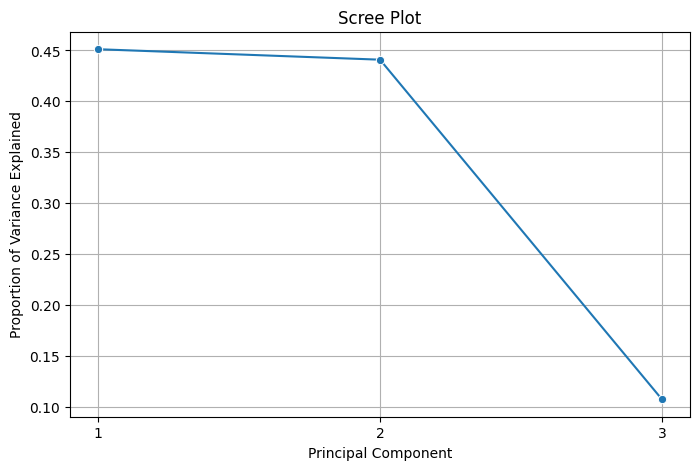

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=[1, 2, 3], y=explained_variance, marker="o")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.xticks([1, 2, 3])
plt.grid(True)
plt.show()

This scree plot shows that we only need the first two components for the data since they cover about 89 percent of the variance

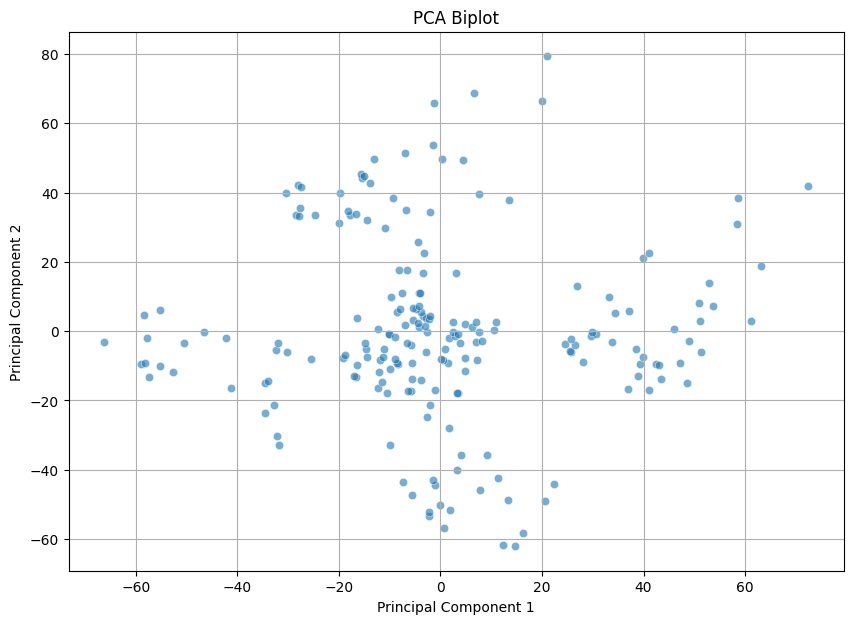

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_scores['PC1'], y=pca_scores['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

There is a dense cluster in the middle with a couple less dense on the outskirts on both sides of both the axises. Most of the customers are in the middle with average behaviors.

There looks to be about 5 clusters with one in the middle and the rest around that. I suggest 5 segments which can find behaviors of income and spending.